In [1]:
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 对网络G进行可视化
def plot_graph(G):
    plt.figure(figsize=(20,15))#为了将图数据看清比对数据
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

In [3]:
# 数据加载，构造图
G = nx.read_gml('./dolphins.gml')
print(G.nodes())#显示各节点
print(len(G.nodes())) #节点个数
print(type(G.nodes())) #类型不是list  需要强转

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
62
<class 'networkx.classes.reportviews.NodeView'>


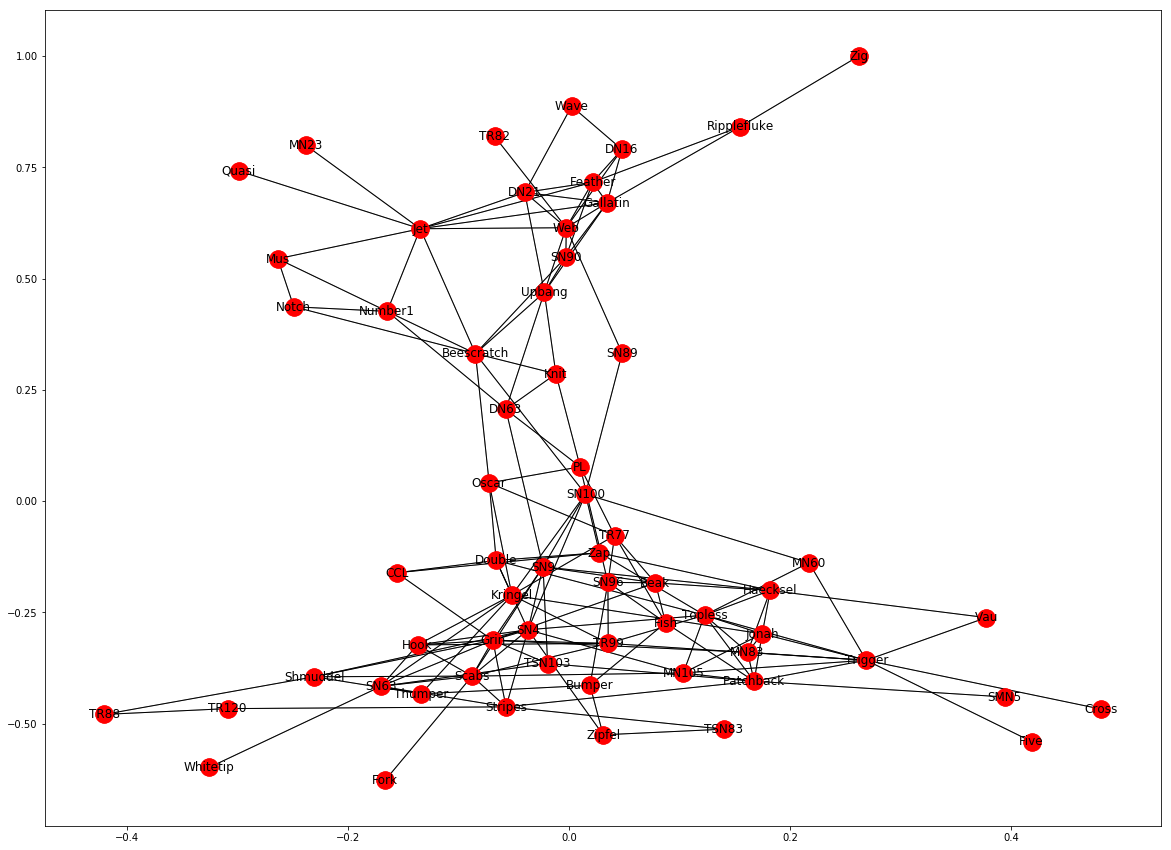

In [14]:
# 可视化
plot_graph(G)

In [5]:
# 构建GCN，计算A_hat和D_hat矩阵

order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)        #邻接矩阵  
np.set_printoptions(threshold=np.inf)#大数组显示全  为了查看数据与邻接矩阵是否运算正确   本人以beak结点为例  根据图中和原gml数据中，有6个边（即其他节点target 0的数据）
#与矩阵符合要求
print(type(A))
print(A)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
<class 'numpy.matrix'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [15]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
print('I:',I)#单位矩阵，与元数据同维
A_hat = A + I #加单位矩阵目的是保留本数据信息
print('A_hat=\n', A_hat)

I: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

In [7]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0] #一维的度矩阵
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))#需要将一维的度矩阵转化为二维的，和邻接矩阵同纬度
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[ 7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [8]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))#这里已经将（D**-1 A H W  中的w权重的列设为了2）也就是将结果维度设置为2维，所以在可视化时可直接显示，不用pca进行降维
print('W_1=\n', W_1)#这里的权重并没有根据网络进行更新
print('W_2=\n', W_2)

W_1=
 [[ 1.33722027  1.03551806  0.29888901  0.22968652]
 [-0.33322423 -0.66054537 -0.34677392  0.34042928]
 [ 1.62181728  2.26403194  0.26837615 -0.47692624]
 [ 0.67236145  1.20253508  1.36061552 -1.15295359]
 [ 2.69521498 -0.00980898 -0.72491422 -0.5992524 ]
 [ 0.51912427  1.46700651 -0.24192004 -0.577642  ]
 [-0.37081577  0.64055576  0.25367456  0.41770995]
 [-0.99533427  0.780715   -0.37419028 -1.07022661]
 [ 0.33764179  0.43770569 -0.36976437  0.65929372]
 [-0.5790083   0.92848731  1.30354567 -0.69786734]
 [ 0.52290352  0.40325947  1.50232868 -0.20215437]
 [ 0.80220255  0.21253258 -1.10670616 -0.3654531 ]
 [-0.68721816  2.49190004  0.00360688 -0.30539057]
 [ 0.300214    1.81649142  0.06705248  2.02515729]
 [-2.83048935  0.35405354 -0.39238327  1.12280349]
 [-3.12377385  0.67922896 -0.77146277 -0.18433628]
 [-0.51852145 -0.77082199  0.86257725  1.80772552]
 [ 0.56296368 -1.14381887 -0.23693846 -0.85793836]
 [ 0.11882966 -0.88623374  0.70916346  0.38425788]
 [-0.29914426  0.27254435

In [19]:
# 不同节点value，绘制不同的颜色
def getValue(value):
    colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
    return colorList[int(value)]
# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()


output(去掉relu)=
: [[-5.88100784e-05  7.12502849e-04]
 [ 1.28244428e-04  1.82772239e-05]
 [-5.12563613e-04  1.28324937e-03]
 [-1.12070562e-04  1.09301938e-03]
 [ 2.88924985e-03  2.75041847e-03]
 [-9.32300070e-04  1.11145600e-03]
 [-5.56846182e-04  6.10251638e-04]
 [ 2.60974964e-04  5.18387252e-04]
 [-1.04175031e-04  7.40759114e-04]
 [-6.22935343e-04  4.70764102e-04]
 [-1.21325527e-04  1.04468920e-03]
 [ 4.38281137e-03 -2.57955418e-04]
 [ 1.41460411e-03  5.97592074e-03]
 [-5.27691247e-04  4.04366793e-04]
 [-3.21501454e-04  9.19021803e-05]
 [-1.76222984e-04  1.33336499e-04]
 [-3.57060318e-04  7.87769171e-06]
 [ 3.66325454e-04 -5.94436084e-04]
 [-2.70249535e-04  7.33516777e-05]
 [ 2.07713625e-04  6.72995506e-04]
 [-3.83628831e-04  4.68650679e-04]
 [-2.43799099e-04  1.39191314e-04]
 [-2.56347075e-03  1.08193849e-03]
 [-1.85906608e-04 -9.32741778e-05]
 [-2.23445745e-04  7.22930006e-05]
 [ 1.18641172e-04 -6.87420404e-04]
 [ 9.86513768e-05 -6.80105931e-04]
 [ 6.33557591e-05 -2.92408393e-04]
 [

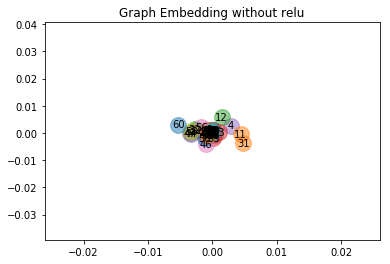

In [20]:
# 这里没有采用relu激活函数，因为元数据的线性特征比较好，加了激活函数反而效果不好了
nodes = list(G.nodes())
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1/2 * A_hat * D_hat**-1/2 * X * W   #这里测试了D**-1/2 A  D**-1/2  H W 
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')

output(去掉relu)=
: [[-0.02118093  0.40458968]
 [ 0.03087611  0.01505985]
 [-0.21718957  0.78907603]
 [-0.09028436  0.37291949]
 [ 0.11060479  0.08624294]
 [-0.2025295   0.29396791]
 [-0.13735434  0.13730788]
 [ 0.16339397  0.2448365 ]
 [-0.10693882  0.27740673]
 [-0.23651813  0.14913041]
 [-0.09351075  0.57461403]
 [ 0.20619272 -0.10629299]
 [-0.13990056  0.17834693]
 [-0.19303353  0.11367699]
 [-0.21593301 -0.1058866 ]
 [ 0.02896781 -0.06831403]
 [-0.35989559 -0.05786899]
 [-0.01591088 -0.07910208]
 [-0.29077517  0.01280749]
 [ 0.13838378  0.3289486 ]
 [-0.26910892  0.23501088]
 [-0.34233094  0.05170529]
 [-0.16920928 -0.02801498]
 [-0.14287901 -0.00892866]
 [-0.2635462   0.00250613]
 [-0.06084332 -0.23640129]
 [-0.02798243 -0.23672443]
 [-0.03622979 -0.06623563]
 [-0.07189281  0.4782193 ]
 [ 0.06955862  0.71343871]
 [-0.24662542 -0.01262377]
 [ 0.30287893 -0.33226267]
 [-0.438856    0.11700857]
 [-0.2948475  -0.12441232]
 [ 0.03605526  0.01150096]
 [-0.32638215  0.11208378]
 [-0.34946

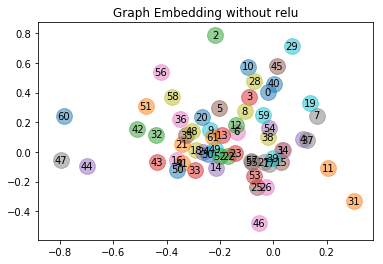

In [21]:
def gcn_layers(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W   #这里测试了D**-1/2 A  D**-1/2  H W    表现反而不如D**-1 A好   在这里还要请教老师一下为什么
H_1 = gcn_layers(A_hat, D_hat, I, W_1)
H_2 = gcn_layers(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')